In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
# debugging = pipeline_params['debugging']
debugging = False
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, verbose=True)

pipeline_dir='/data/bwedig/mejiro/pipeline'


100%|██████████| 10245/10245 [05:10<00:00, 33.00it/s]


In [3]:
lens_subset = [l for l in all_lenses if l.num_images == 3]
print(f'{len(lens_subset)=}')

len(lens_subset)=177


(array([7967.,    0.,    0.,    0.,    0.,  177.,    0.,    0.,    0.,
        2101.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

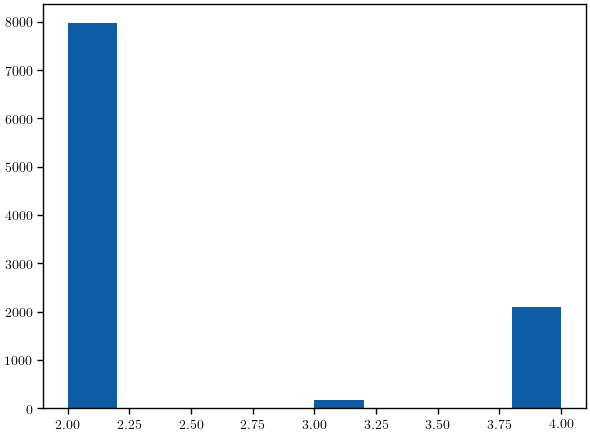

In [4]:
plt.hist([l.num_images for l in all_lenses])

In [5]:
arrays = []
for lens in lens_subset:
    _, f129, rgb_image = lens_util.get_sample(pipeline_dir, index=lens.uid, model=False, band='F129', rgb_bands=['F184', 'F129', 'F106'])
    arrays.append(rgb_image)

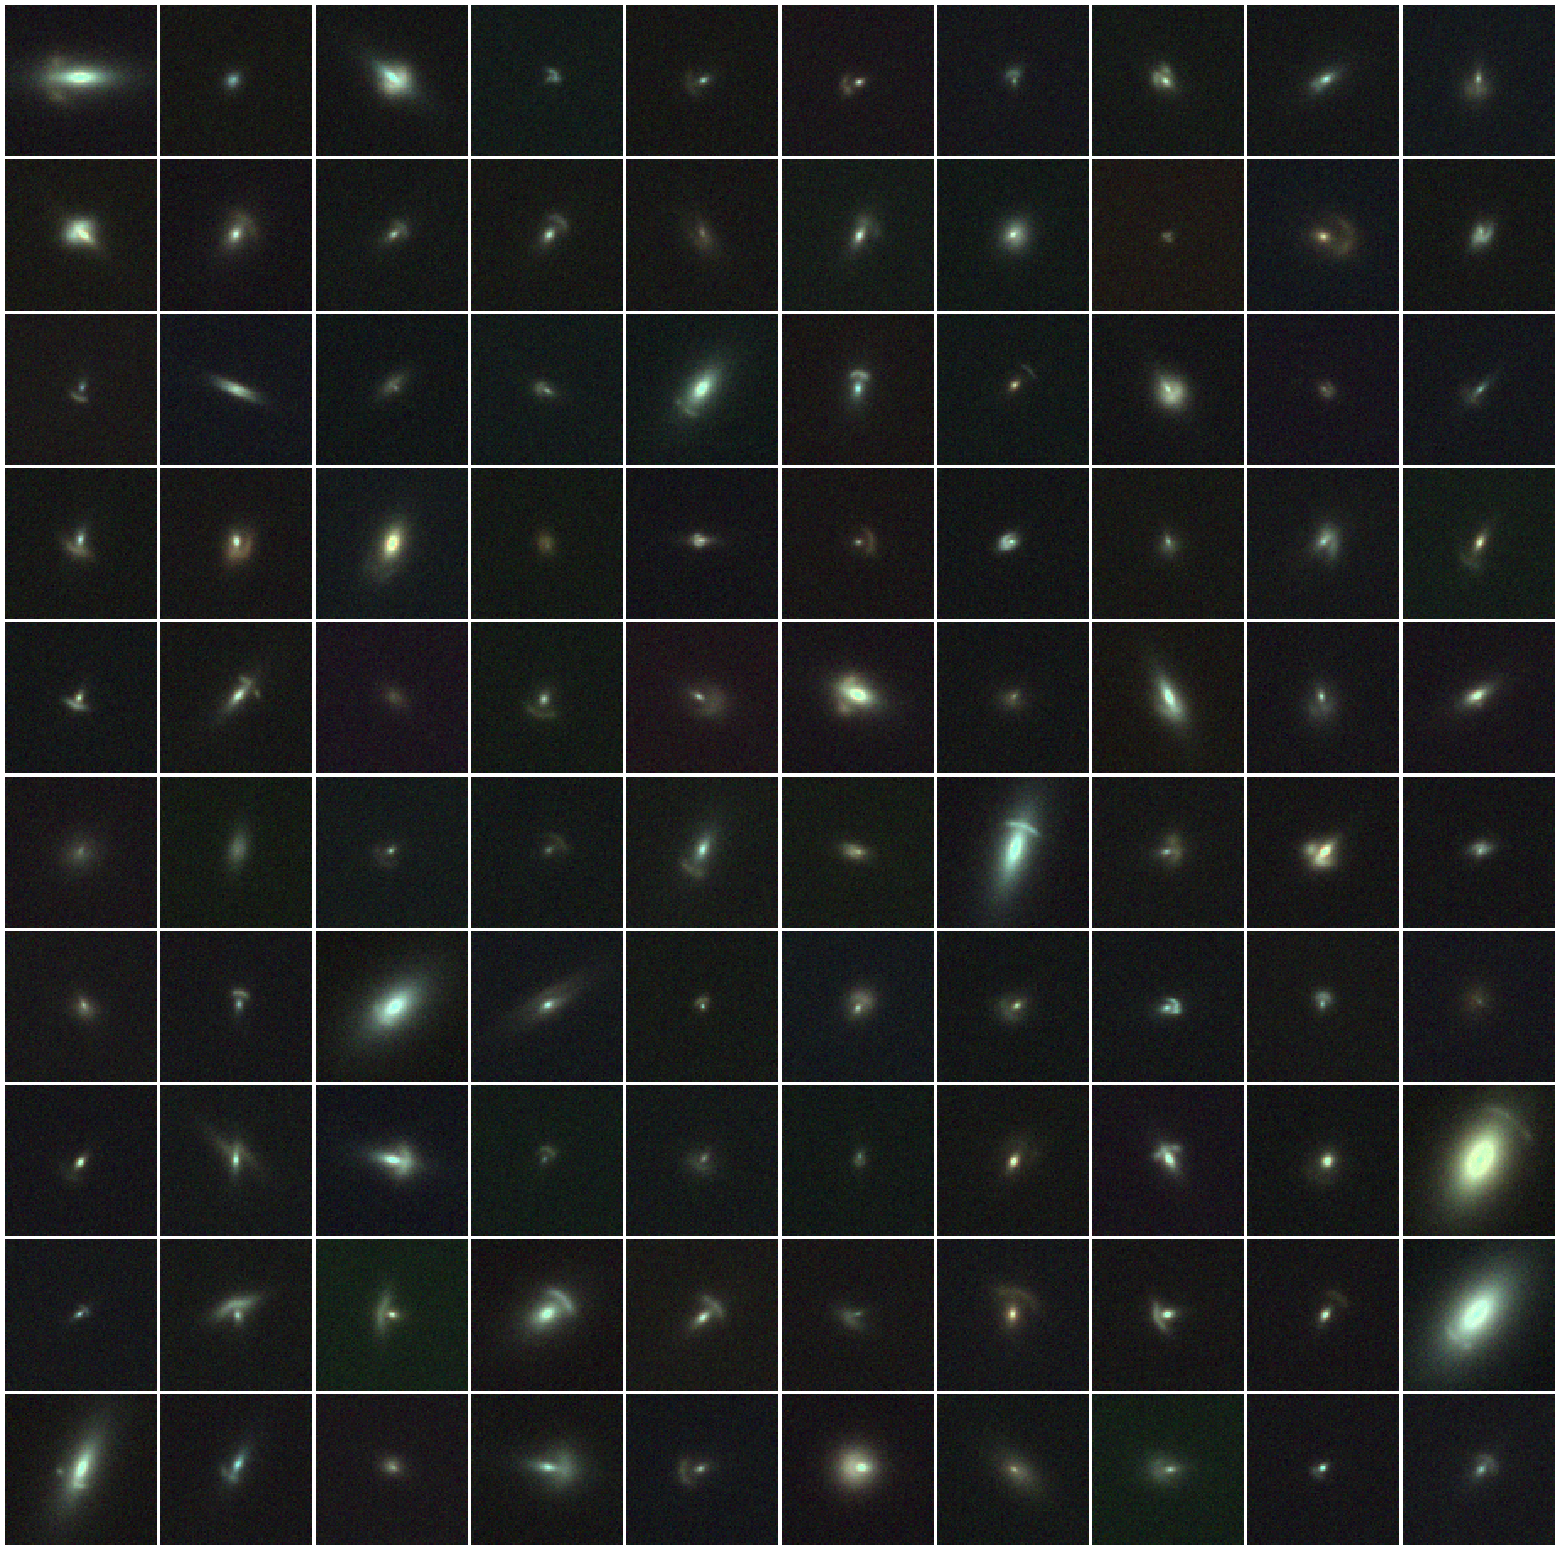

In [7]:
plot.rgb_plot_grid(arrays, side=10)